<a href="https://colab.research.google.com/github/AKBER-HUSSAIN/ML_Lab_Practice/blob/main/Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

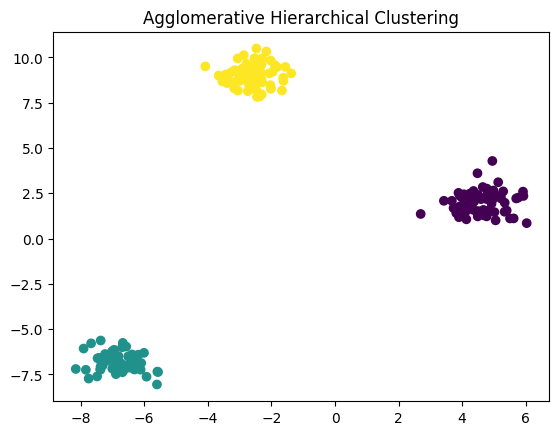

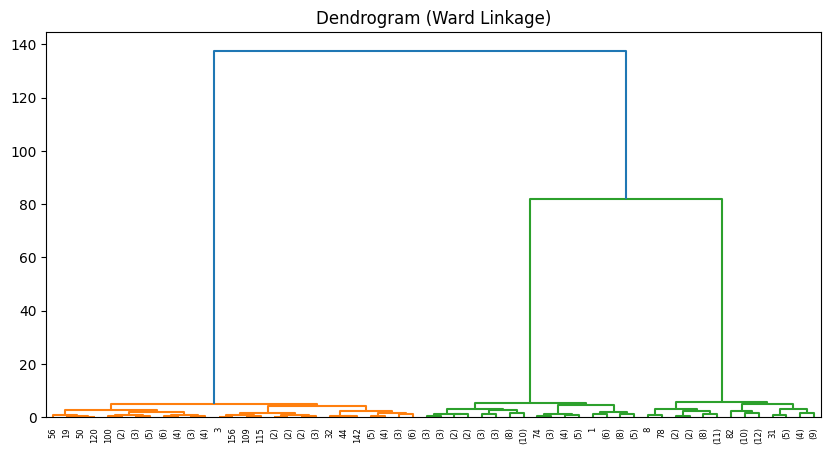

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=42)


agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X)


plt.scatter(X[:,0], X[:,1], c=labels_agg, cmap="viridis")
plt.title("Agglomerative Hierarchical Clustering")
plt.show()


linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (Ward Linkage)")
plt.show()


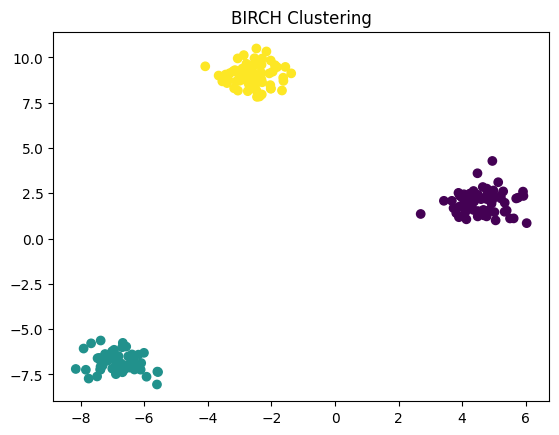

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch

# Generate dataset
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=42)

# Apply BIRCH
birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(X)

# Plot clusters
plt.scatter(X[:,0], X[:,1], c=labels_birch, cmap="viridis")
plt.title("BIRCH Clustering")
plt.show()


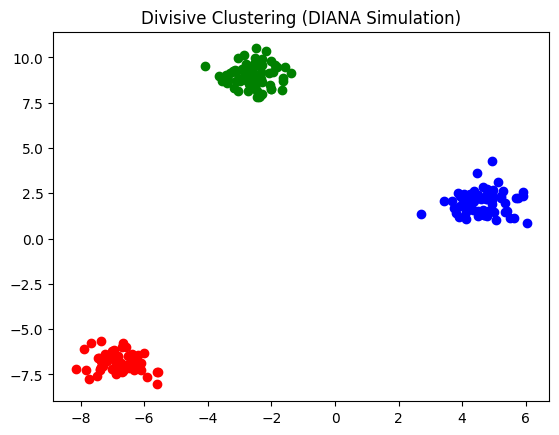

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate dataset
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=42)

# Function: Divisive Clustering (DIANA Simulation using KMeans splits)
def divisive_clustering(X, k=3):
    clusters = [X]   # start with all data as one cluster

    while len(clusters) < k:
        # Pick the largest cluster to split
        largest_cluster = max(clusters, key=len)
        clusters.remove(largest_cluster)

        # Split into 2 using KMeans
        km = KMeans(n_clusters=2, random_state=42).fit(largest_cluster)
        y = km.labels_

        # Create new clusters
        clusters.append(largest_cluster[y==0])
        clusters.append(largest_cluster[y==1])

    return clusters

# Run DIANA simulation
clusters = divisive_clustering(X, k=3)

# Plot results
colors = ['red', 'green', 'blue']
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:,0], cluster[:,1], color=colors[i])
plt.title("Divisive Clustering (DIANA Simulation)")
plt.show()
